In [1]:
import numpy as np
import matplotlib.pyplot as plt   
from scipy import stats
import os
import random
import pandas as pd
import re
from tvb.simulator.lab import *
import nibabel as nib


/home/etienne/env/src/tvb-library/scientific_library/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [2]:
# Import the anatomical structural connectivity.
pathc='/home/etienne/data/connectivity/'
A148_con = connectivity.Connectivity.from_file(pathc+'Allen_148.zip')
nregions = len(A148_con.weights)     #number of regions
A148_con.speed = np.asarray(np.inf)  #set the conduction speed
np.fill_diagonal(A148_con.weights, 0.)
A148_con.weights = A148_con.weights/np.max(A148_con.weights) #normalization
A148_con.configure()
A148_SC = A148_con.weights

file_refs= nib.load(pathc + 'Vol_148_Allen.nii')

A148= file_refs.get_fdata() 

# ROIs Labels 
with open(pathc+'region_labels.txt') as f:
    content = f.readlines()   # remove whitespace characters like `\n` at the end of each line
ROIs = [ix.strip() for ix in content] 

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


In [3]:
regions=pd.read_csv('modules.csv')
Modules = {'DMN':[
'Right Temporal association areas',#TeA
'Left Temporal association areas',#TeA
'Right Retrosplenial area, lateral agranular part',#Rs
'Right Retrosplenial area, dorsal part',#Rs
'Right Retrosplenial area, ventral part',#Rs
'Left Retrosplenial area, lateral agranular part',#Rs
'Left Retrosplenial area, dorsal part',#Rs
'Left Retrosplenial area, ventral part',#Rs
'Right Anterior cingulate area, dorsal part',#Cg
'Right Anterior cingulate area, ventral part',#Cg
'Left Anterior cingulate area, dorsal part',#Cg
'Left Anterior cingulate area, ventral part',#Cg
'Right Orbital area, lateral part',#OFc
'Right Orbital area, medial part',#OFc
'Left Orbital area, lateral part',#OFc
'Left Orbital area, medial part',#OFc
'Right Primary auditory area',#seemed nice
'Left Primary auditory area',#seemed nice
'Right Anterolateral visual area',#seemed nice
'Left Anterolateral visual area',#seemed nice
'Right Anteromedial visual area',#seemed nice
'Left Anteromedial visual area',#seemed nice
'Right Lateral visual area',#seemed nice
'Left Lateral visual area',#seemed nice
'Right Primary visual area',#seemed nice
'Left Primary visual area',#seemed nice
'Right posteromedial visual area',#seemed nice
'Left posteromedial visual area',#seemed nice
'Right Ectorhinal area',#seemed nice
'Left Ectorhinal area',#seemed nice
],
     'LCN':[
'Right Primary somatosensory area, nose',#S1
'Right Primary somatosensory area, barrel field',#S1
'Right Primary somatosensory area, lower limb',#S1
'Right Primary somatosensory area, mouth',#S1
'Right Primary somatosensory area, upper limb',#S1
'Right Primary somatosensory area, trunk',#S1
'Right Supplemental somatosensory area',#S2
'Left Primary somatosensory area, nose',#S1
'Left Primary somatosensory area, barrel field',#S1
'Left Primary somatosensory area, lower limb',#S1
'Left Primary somatosensory area, mouth',#S1
'Left Primary somatosensory area, upper limb',#S1
'Left Primary somatosensory area, trunk',#S1
'Left Supplemental somatosensory area',#S2
'Right Primary motor area',#M1
'Left Primary motor area',#M1
'Right Agranular insular area, dorsal part',#seemed nice
'Right Agranular insular area, posterior part',#seemed nice
'Left Agranular insular area, dorsal part',#seemed nice
'Left Agranular insular area, posterior part',#seemed nice
 ],
           
    'Hc':[
'Right Field CA1',#Hc
'Right Field CA3',#Hc
'Right Dentate gyrus',#Hc
'Right Parasubiculum',#Hc
'Right Subiculum',#Hc
'Left Field CA1',#Hc
'Left Field CA3',#Hc
'Left Dentate gyrus',#Hc
'Left Parasubiculum',#Hc
'Left Subiculum',#Hc
'Right Anterior pretectal nucleus',#Hc
'Left Anterior pretectal nucleus',#Hc
'Right Medial geniculate complex',#seemed nice
'Left Medial geniculate complex',#seemed nice
'Right Dorsal part of the lateral geniculate complex',#seemed nice
'Left Dorsal part of the lateral geniculate complex',#seemed nice
'Right Superior colliculus, motor related',
'Left Superior colliculus, motor related',
'Right Midbrain reticular nucleus',#seemed nice
'Left Midbrain reticular nucleus',#seemed nice
'Right Lateral posterior nucleus of the thalamus',#Lateral Dorsal Th
'Left Lateral posterior nucleus of the thalamus',#Lateral Dorsal Th
'Right Mediodorsal nucleus of thalamus',
'Left Mediodorsal nucleus of thalamus',#Th

],
    'BF':[
'Right Nucleus accumbens',#Acb
'Left Nucleus accumbens',#Acb
'Right Anterior olfactory nucleus',#AO
'Left Anterior olfactory nucleus',#AO
'Right Lateral septal nucleus, rostral (rostroventral) part', #seemed nice
'Left Lateral septal nucleus, rostral (rostroventral) part', #seemed nice
'Right Substantia innominata',#seemed nice
'Left Substantia innominata',#seemed nice
],
    'VM':[
'Right Anterior hypothalamic nucleus',#Hypo
'Right Lateral hypothalamic area',#Hypo
'Left Anterior hypothalamic nucleus',#Hypo
'Left Lateral hypothalamic area',#Hypo
'Right Cortical amygdalar area, posterior part',#Amy
'Right Lateral amygdalar nucleus',#Amy
'Right Basolateral amygdalar nucleus',#Amy
'Right Basomedial amygdalar nucleus',#Amy
'Left Cortical amygdalar area, posterior part',#Amy
'Left Lateral amygdalar nucleus',#Amy
'Left Basolateral amygdalar nucleus',#Amy
'Left Basomedial amygdalar nucleus',#Amy
'Right Entorhinal area, lateral part',#Hc
'Left Entorhinal area, lateral part',#Hc
'Right Postpiriform transition area',#seemed nice
'Left Postpiriform transition area',#seemed nice
'Right Endopiriform nucleus, dorsal part',#seemed nice
'Left Endopiriform nucleus, dorsal part',#seemed nice
],
    'Th':[
'Right Ventral anterior-lateral complex of the thalamus',#Ventral Dorsal Th
'Right Ventral medial nucleus of the thalamus',#Ventral Dorsal Th
'Right Posterior complex of the thalamus',#Lateral Dorsal Th
'Right Lateral dorsal nucleus of thalamus',#Lateral Dorsal Th
'Left Ventral anterior-lateral complex of the thalamus',#Ventral Dorsal Th
'Left Ventral medial nucleus of the thalamus',#Ventral Dorsal Th
'Left Posterior complex of the thalamus',#Lateral Dorsal Th
'Left Lateral dorsal nucleus of thalamus',#Lateral Dorsal Th
'Right Reticular nucleus of the thalamus',#Th
'Left Reticular nucleus of the thalamus',#Th

],
    'Other':[
'Right Frontal pole, cerebral cortex', 
'Right Infralimbic area',
'Right Caudoputamen', 
'Right Inferior colliculus',
'Right Ventral cochlear nucleus',
'Right Nucleus of the solitary tract',
'Right Spinal nucleus of the trigeminal, caudal part',
'Right Intermediate reticular nucleus',
'Right Medullary reticular nucleus',
'Right Medial vestibular nucleus', 
'Right Central lobule',
'Right Culmen', 
'Right Folium-tuber vermis (VII)',
'Right Ansiform lobule', 
'Right Paramedian lobule',
'Right Interposed nucleus', 
'Left Frontal pole, cerebral cortex',
'Left Infralimbic area',
'Left Caudoputamen',
'Left Inferior colliculus', 
'Left Ventral cochlear nucleus',
'Left Nucleus of the solitary tract',
'Left Spinal nucleus of the trigeminal, caudal part',
'Left Intermediate reticular nucleus',
'Left Medullary reticular nucleus',
'Left Medial vestibular nucleus', 
'Left Central lobule',
'Left Culmen', 
'Left Folium-tuber vermis (VII)',
'Left Ansiform lobule', 
'Left Paramedian lobule',
'Left Interposed nucleus',
'Right Paraflocculus',
'Left Paraflocculus',
'Right Principal sensory nucleus of the trigeminal',
'Left Principal sensory nucleus of the trigeminal',
'Right Pontine reticular nucleus',
'Left Pontine reticular nucleus',
]
}

FHubs={'vSub':[
''    
],
    'AON':[
'Right Anterior olfactory nucleus',#AO
'Left Anterior olfactory nucleus',#AO
],
    'Cg':[
'Right Anterior cingulate area, dorsal part',#Cg
'Right Anterior cingulate area, ventral part',#Cg
'Left Anterior cingulate area, dorsal part',#Cg
'Left Anterior cingulate area, ventral part',#Cg
],
    'Hc':[
]
}

In [92]:
def go_edge(tseries):
    nregions=tseries.shape[1]
    Blen=tseries.shape[0]
    nedges=int(nregions**2/2-nregions/2)
    iTriup= np.triu_indices(nregions,k=1) 
    gz=stats.zscore(tseries,nan_policy='omit')
    Eseries = gz[:,iTriup[0]]*gz[:,iTriup[1]]
    return Eseries

def edges_str(Bold):
    return(np.sqrt(np.sum(go_edge(Bold)**2,axis=1)))

def Giom_mean(Bold):
    a=edges_str(Bold)
    G=go_edge(Bold)
    Blen=len(a)
    top=G[a>np.percentile(a,95),:]
    dFC=np.corrcoef(top)
    return(np.mean(dFC))
    #return(np.sum(np.abs(a[1:]-a[:Blen-1]))/Blen)

def edges_var(Bold):
    a=edges_str(Bold)
    Blen=len(a)
    return(np.sum(np.abs(a[1:]-a[:Blen-1]))/Blen)  

def varmeangrad(bold):
    Edges=go_edge(bold)
    measure=np.var(np.mean(np.gradient(Edges.T,axis=1),axis=1))
    return(measure)

def meanvargrad(bold):
    Edges=go_edge(bold)
    measure=np.mean(np.var(np.gradient(Edges.T,axis=1),axis=1))
    return(measure)

def edge_to_FC(edge,n=108):
    A=np.zeros((n,n))
    triu=np.triu_indices(n, 1)
    A[triu]=edge
    tril=(triu[1],triu[0])
    A[tril]=edge
    A[np.arange(n),np.arange(n)]=[1]*n
    return(A)


def CAP(B1,thresh=95):
    #Return the co-activation patterns (edges) of strongest RSS of the Bold signal
    #If there are consecutives CAP of high RSS they are averaged 
    
    volume=B1.shape[0]
   
    Edges=go_edge(B1)
    
    RSS=edges_str(B1)
    p=np.percentile(RSS,thresh)
    edgec=np.arange(volume)[RSS>p]
    keep=[True]*edgec.shape[0]
    CAP=[]
    j=0
    for k in edgec:
        cap=Edges[k,:]
        i=1
        while np.isin(edgec,k+i).any():
            cap+=Edges[k+i,:]
            edgec=np.delete(edgec,np.where(edgec==k+i))
            keep[j+i]=False
            i+=1
        j+=1
        cap=cap/i
        CAP.append(cap)
    CAP=np.array(CAP)
    return(CAP[keep])

def detect_elbow(cap):
    order=np.argsort(np.sum(np.abs(cap),axis=0))
    cap_ord=cap[:,order]
    gradient=np.gradient(np.sum(np.abs(cap_ord),axis=0))
    
    
    thresh=8*np.median(gradient)
    if (np.arange(148)[gradient>thresh]>95).any():
        elbow=np.min(np.arange(148)[gradient>thresh][np.arange(148)[gradient>thresh]>95])
    
        return(True,regions.iloc[order[elbow:]].index)

    return(False,np.nan)

In [5]:
def functional_hub(FC,nregions=5):
    #Return the nregions regions having the biggest participation in the 3 biggest eigenvectors (moduled by the eigenvalues)
    #The regions are sorted in a decreasing importance 
    
    if np.isnan(FC).any():
        M=np.zeros(nregions)
        M[:]=np.nan
        return(M)
    D,E=np.linalg.eig(FC)
    order=np.argsort(np.sum(np.abs(E[:,:3])*D[:3],axis=1))
    return(np.flip(order[-nregions:]))

def common_hubs(B1,B2,n=8):
    hub1=functional_hub(B1,nregions=n)
    hub2=functional_hub(B2,nregions=n)
    return(np.intersect1d(hub1,hub2))

def predictive_power(B1,B2):
    FC1=np.corrcoef(B1.T)
    FC2=np.corrcoef(B2.T)
    T1=FC1[np.triu_indices(FC1.shape[0],k=1)]
    T2=FC2[np.triu_indices(FC2.shape[0],k=1)]
    if np.isnan([FC1,FC2]).any():
        return([0,0])
    return(stats.pearsonr(T1,T2))

def best_PP(Bold,Bsim):
    m=Bsim.shape[2]
    M=np.zeros(m)
    for k in range(m):
        M[k]=predictive_power(Bold,Bsim[:,:,k])[0]
    return(np.argwhere(M == np.amax(M)),np.amax(M))

In [6]:
path='/home/etienne/data/simu_a/'
path2='/home/etienne/data/dataXetien/'

remove_roi=[55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
            129, 130,  131,  132,  133,  134,  135,  136,  137,  138,  139,  140, 141, 142, 143,144,145,146,147, 27, 101]

In [7]:
Blen=2000
nregions=148
file_number=(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]))
B=np.zeros((Blen,nregions,file_number))
param=np.zeros((file_number,2))
regex = re.compile('\d*\.?\d+')

i=0
for filename in os.listdir(path):
    bold=np.load(path+filename)['Bold_data'][-Blen:,0,:]
    G,a=np.array(regex.findall(filename),dtype='float')[1:]
    B[:,:,i]=bold
    param[i,:]=np.round(G,decimals=3),np.round(a,decimals=3)
    i+=1

In [8]:
data=np.load(path2+'EPI_DMN_A30_CNO_Wt89{}_Baseline.npy'.format(34))
Blen=data.shape[0]
nregions=data.shape[1]-len(remove_roi)
Bemp=np.zeros((8,Blen,nregions))
i=0
for k in [34,36,38,40,41,42,43,44]:
    bold=np.load(path2+'EPI_DMN_A30_CNO_Wt89{}_Baseline.npy'.format(k))
    bold=np.delete(bold,remove_roi,axis=1)
    Bemp[i,:,:]=bold
    i+=1

In [9]:
G_LIST     = list(np.round(np.arange(0.54,0.70,0.005),decimals=3))
a_LIST     = list(np.round(np.arange(0,1,0.05),decimals=3))
paramset=np.zeros((len(G_LIST),len(a_LIST)))
k,j=0,0
for kk in G_LIST:
    j=0
    for jj in a_LIST:
        if [kk,jj] in param.tolist():
            paramset[k,j]=1
        j+=1
    k+=1

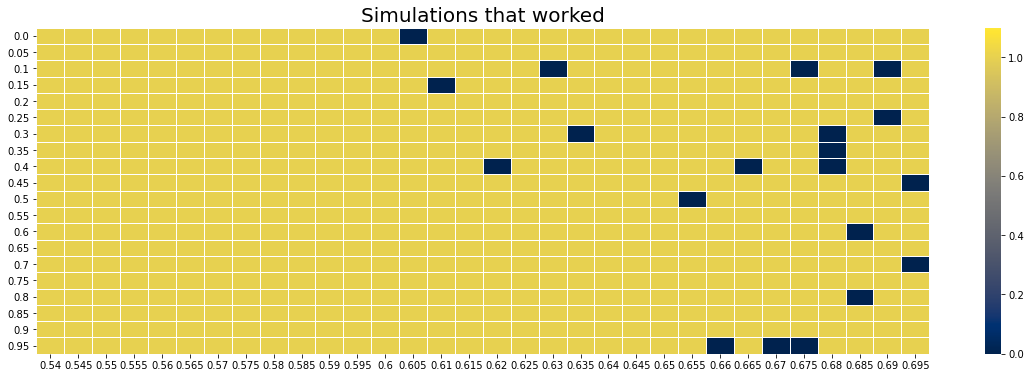

In [10]:
import seaborn as sns
plt.figure(figsize=(20,6))
plt.title('Simulations that worked',fontdict={'fontsize':20})

ax=sns.heatmap(paramset.T,cmap='cividis',linewidths=.8,xticklabels=G_LIST,yticklabels=a_LIST,vmax=1.1)


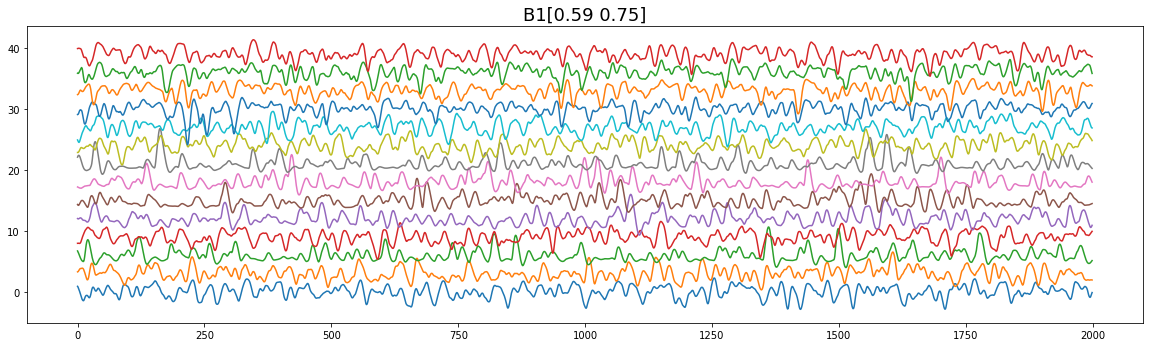

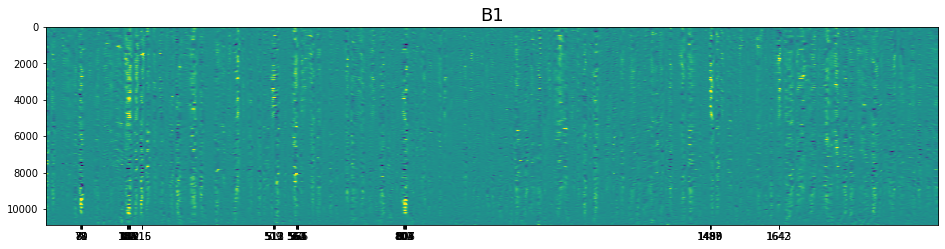

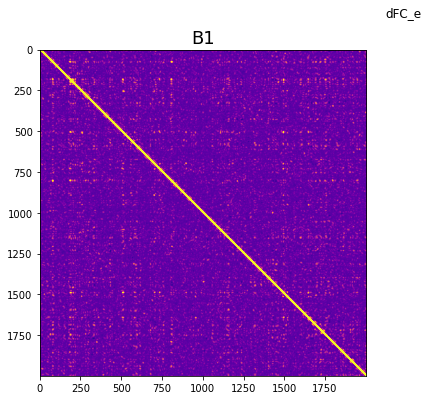

In [105]:
G=0.59
a=0.75
k=(np.where((param[:,0]==G)&(param[:,1]==a)))[0][0]
B1=B[:,:,k]
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title('B1'+np.str(param[k,:]),fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(B1[:,i])+3*i)
    

p=np.percentile(edges_str(B1),98)
edgec=np.arange(2000)[edges_str(B1)>p]

plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('B1',fontsize=18)
plt.imshow(go_edge(B1).T,vmin=-2.5,vmax=2.5,aspect='auto')
plt.xticks(edgec)

plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('B1',fontsize=18)
plt.imshow(np.corrcoef(go_edge(B1)),cmap='plasma',vmax=0.2)


In [106]:
Fhubsregions=regions.copy()
CAhubs=np.zeros(148)

cap_bold=CAP(B1,thresh=98)
for k in range(cap_bold.shape[0]):
    FC=edge_to_FC(cap_bold[k,:],n=148)
    hubs=functional_hub(FC,nregions=3)
    CAhubs[hubs]+=1

Fhubsregions['hubs']=CAhubs

In [107]:
ca=CAP(B1,thresh=98)
M=np.zeros((ca.shape[0],148))
    
for k in range(ca.shape[0]):
    var=ca[k,:]
    fc=edge_to_FC(var,n=148)
    w,v=np.linalg.eig(fc)
    for p in range(148):
        M[k,p]=stats.pearsonr((v[:,0]),A148_SC[p,:])[0]

<AxesSubplot:>

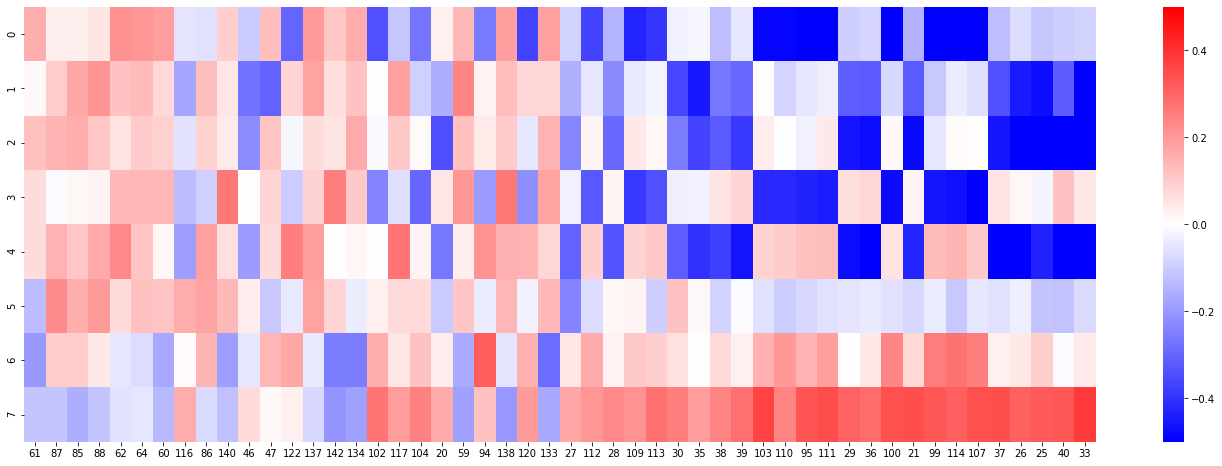

In [108]:
import seaborn as sns
plt.figure(figsize=(24,8))
order=np.argsort(np.sum(np.abs(M),axis=0))
M_ord=M[:,order]
sns.heatmap(M_ord[np.argsort(np.sum(M_ord,axis=1)),-50:],cmap='bwr',xticklabels=order[-50:],vmin=-0.5,vmax=0.5)

In [109]:
regions.iloc[order[-10:]]

,regions,module
100,Left Ectorhinal area,DMN
21,"Right Agranular insular area, posterior part",LCN
99,Left Temporal association areas,DMN
114,Left Caudoputamen,Other
107,"Left Entorhinal area, lateral part",VM
37,Right Lateral amygdalar nucleus,VM
26,Right Ectorhinal area,DMN
25,Right Temporal association areas,DMN
40,Right Caudoputamen,Other
33,"Right Entorhinal area, lateral part",VM


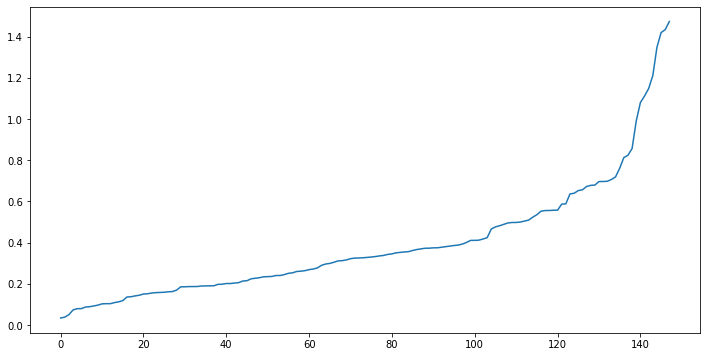

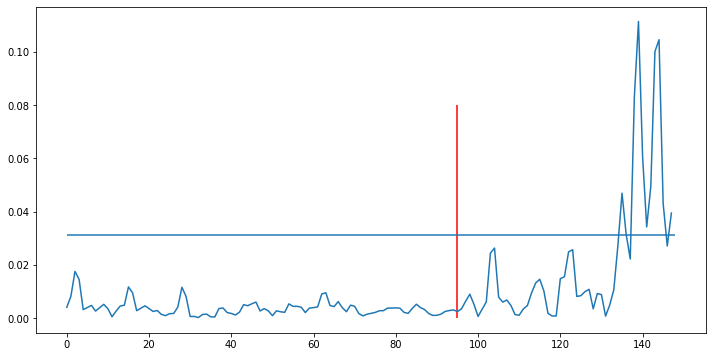

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.sum(np.abs(M_ord),axis=0))

gradient=np.gradient(np.sum(np.abs(M_ord),axis=0))

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(gradient)
ax.vlines(95,0,0.08,colors='r')
ax.hlines(8*np.median(gradient),0,148)

In [93]:
detect_elbow(M)

(True,
 Int64Index([133, 29, 36, 37, 99, 40, 107, 25, 64, 33, 26], dtype='int64'))

In [94]:
regions.iloc[detect_elbow(M)[1],:]

,regions,module
133,Left Principal sensory nucleus of the trigeminal,Other
29,Right Postpiriform transition area,VM
36,"Right Endopiriform nucleus, dorsal part",VM
37,Right Lateral amygdalar nucleus,VM
99,Left Temporal association areas,DMN
40,Right Caudoputamen,Other
107,"Left Entorhinal area, lateral part",VM
25,Right Temporal association areas,DMN
64,Right Intermediate reticular nucleus,Other
33,"Right Entorhinal area, lateral part",VM


In [11]:
Measures=pd.read_csv('Measures_aswipe.csv')

ValueError: Length mismatch: Expected axis has 4 elements, new values have 5 elements

In [19]:
hub_number=5
m=B.shape[2]
q=Bemp.shape[0]
Common_hubs=np.zeros((m,q))
Bsimbis=np.delete(B,remove_roi,axis=1)

for k in range(m):
    inter=np.zeros(q)
    for i in range(q):
        hubs=common_hubs(Bemp[i,:,:],Bsimbis[:,:,k],n=hub_number)
        inter[i]=len(hubs)
    Common_hubs[k,:]=inter

[Text(0.5, 51.0, 'Parameter couple'), Text(159.0, 0.5, 'Empirical dataset')]

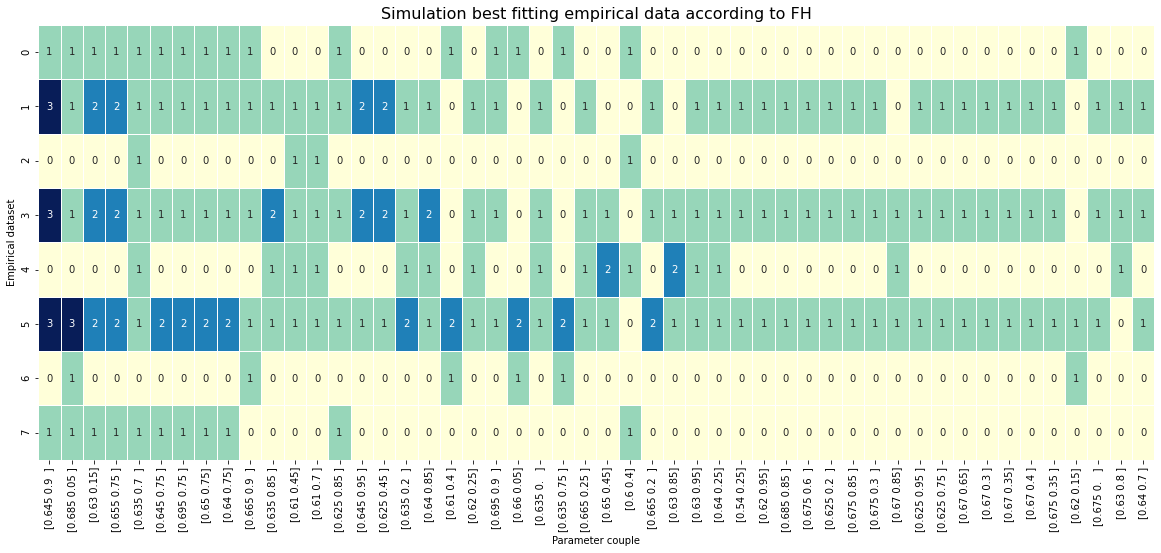

In [20]:
Count=np.sum(Common_hubs,axis=1)
sortedsim=(np.flip(np.unravel_index(np.argsort(Count, axis=None), Count.shape)[0]))
num_sim=50

to_plot=Common_hubs[sortedsim[:num_sim],:]
plt.figure(figsize=(20,8))
plt.title('Simulation best fitting empirical data according to FH',fontdict={'fontsize':16})
ax = sns.heatmap(to_plot.T, cmap='YlGnBu',annot=True,xticklabels=param[sortedsim[:num_sim],:],cbar=False,linewidths=.8)
ax.set(xlabel="Parameter couple", ylabel = "Empirical dataset")

In [65]:
regions["remove_ROI"]=np.isin(regions.index.tolist(),remove_roi)